In [2]:
import numpy as np
import pandas as pd
import sqlite3

from pandas import Series, DataFrame

player_stats = pd.read_csv('player_stats.csv')

conn = sqlite3.connect('Semester_project.db')

#player_shooting_file.to_sql('Player_Stats', conn)

table_stats = pd.read_sql('SELECT * FROM Player_Stats WHERE goals > 1', conn)




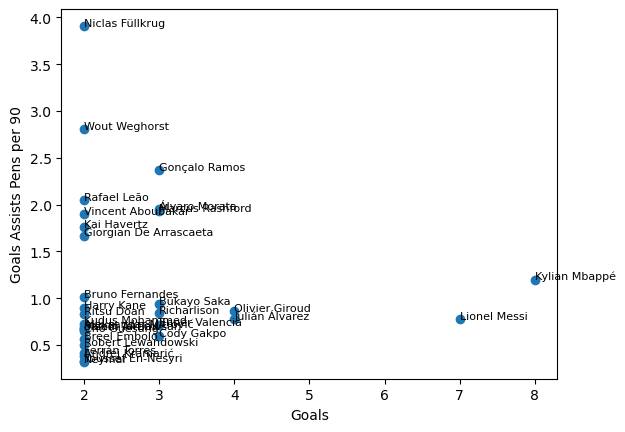

In [3]:
import matplotlib.pyplot as plt

x = table_stats['goals']

y = table_stats['goals_assists_pens_per90']

z = table_stats['player']

plt.scatter(x,y)

for i, txt in enumerate(z):
    plt.annotate(txt, (x[i], y[i]), fontsize=8)
    
plt.xlabel('Goals')
plt.ylabel('Goals Assists Pens per 90')
plt.show()



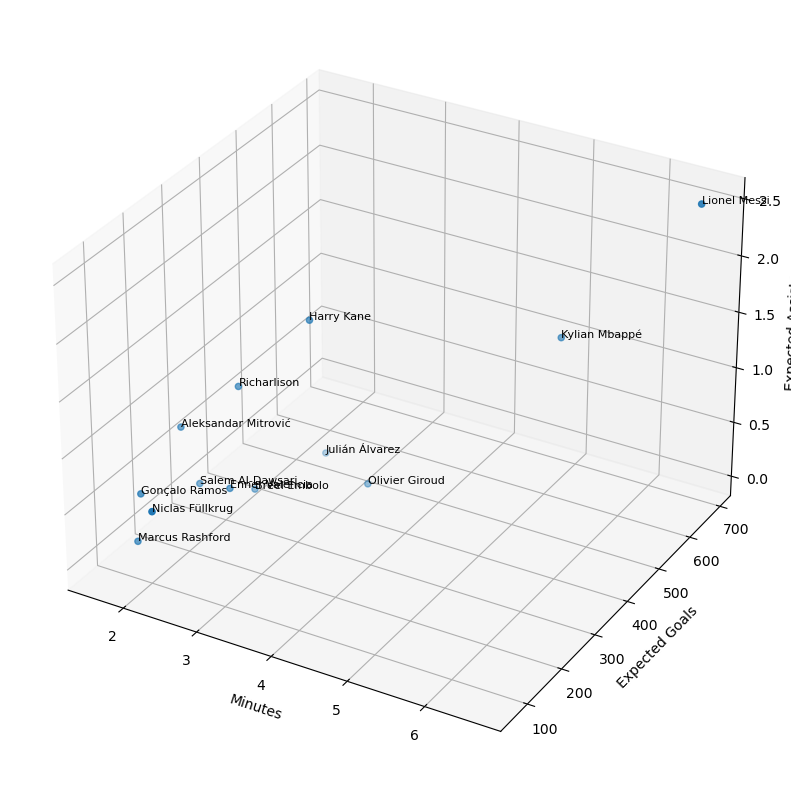

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import adjustText


xg = pd.read_sql('SELECT * FROM Player_Stats WHERE xg > 1.5 and goals_assists_pens_per90 > .50', conn)

x = xg['xg']

y = xg['minutes']

xg_assists = xg['xg_assist']

z = xg['player']

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, xg_assists)

texts=[]

for i, txt in enumerate(z):
    texts.append(ax.text(x.iloc[i], y.iloc[i], xg_assists.iloc[i], txt, fontsize=8))  # use .iloc for pandas series and set fontsize
 
plt.xlabel('Minutes')
plt.ylabel('Expected Goals')
ax.set_zlabel('Expected Assists')

#plt.ylim(0, 2.45)
plt.savefig('attacker_3dgraph.png')

plt.show()


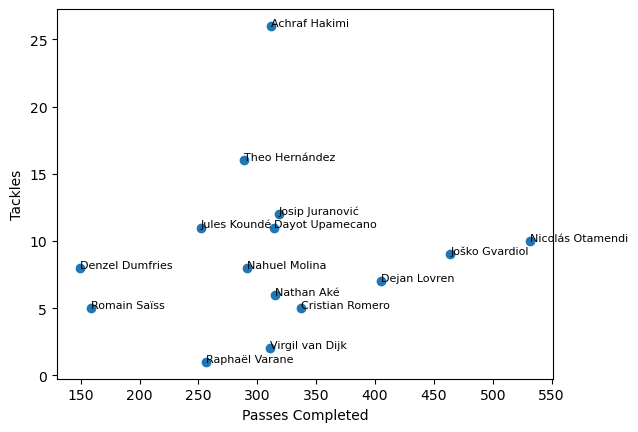

    index            player position         team     age  birth_year  \
0      15     Achraf Hakimi       DF      Morocco  24-044        1998   
1     133   Cristian Romero       DF    Argentina  24-235        1998   
2     157   Dayot Upamecano       DF       France  24-052        1998   
3     160      Dejan Lovren       DF      Croatia  33-166        1989   
4     163   Denzel Dumfries       DF  Netherlands  26-244        1996   
5     316   Josip Juranović       DF      Croatia  27-124        1995   
6     325    Joško Gvardiol       DF      Croatia  20-329        2002   
7     329      Jules Koundé       DF       France  24-036        1998   
8     470     Nahuel Molina       DF    Argentina  24-256        1998   
9     473        Nathan Aké       DF  Netherlands  27-303        1995   
10    491  Nicolás Otamendi       DF    Argentina  34-309        1988   
11    532    Raphaël Varane       DF       France  29-237        1993   
12    554      Romain Saïss       DF      Morocco  

In [5]:
player_defending = pd.read_csv('player_defense.csv')

conn = sqlite3.connect('Semester_project.db')

#player_defending.to_sql('Player_Defending', conn)

player_passing = pd.read_csv('player_passing.csv')

#player_passing.to_sql('Player_Passing', conn)

defenders_tackling = pd.read_sql('SELECT tackles from Player_Defending WHERE position == "DF" and minutes_90s > 5', conn)

defenders_passing = pd.read_sql('SELECT passes_completed from Player_Passing WHERE position =="DF" and minutes_90s > 5', conn)

defenders = pd.read_sql('SELECT * from Player_Defending WHERE position =="DF" and minutes_90s > 5', conn)


d_x = defenders_passing

d_y = defenders_tackling

d_z = defenders['player']

plt.scatter(d_x,d_y)

for i, txt in enumerate(d_z):
    plt.annotate(txt, (d_x.iloc[i], d_y.iloc[i]), fontsize=8)
    
plt.xlabel('Passes Completed')
plt.ylabel('Tackles')
plt.show()

print(defenders)


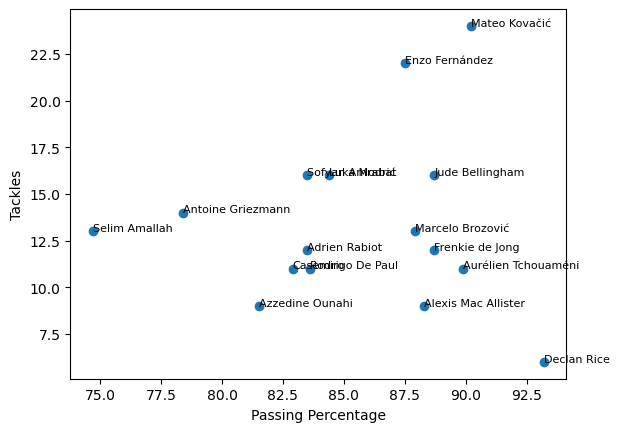

In [6]:
#Defensive midfielders

dmidfielders_passing = pd.read_sql('SELECT passes_pct FROM Player_Passing WHERE position == "MF" and minutes_90s >4', conn)
                                  
dmidfielders_tackling = pd.read_sql('SELECT tackles FROM Player_Defending WHERE position =="MF" and minutes_90s > 4', conn)
                                  
defmid_x = dmidfielders_passing
                                   
defmid_y = dmidfielders_tackling
                                   
defmids = pd.read_sql('SELECT * FROM Player_passing WHERE position =="MF" and minutes_90s > 4', conn)

defmid_z = defmids['player']

plt.scatter(defmid_x, defmid_y)                                   
                                   
for i, txt in enumerate(defmid_z):
    plt.annotate(txt, (defmid_x.iloc[i], defmid_y.iloc[i]), fontsize=8)
    
plt.xlabel('Passing Percentage')
plt.ylabel('Tackles')
plt.show()

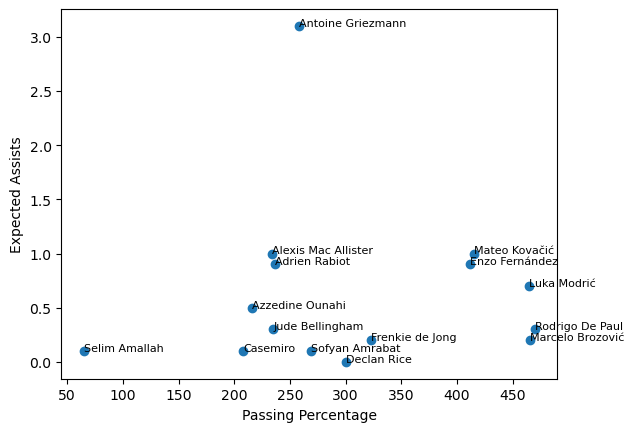

In [7]:
mid_passing = pd.read_sql('SELECT passes_completed FROM Player_Passing WHERE position == "MF" and minutes_90s >4 and player != "Aurélien Tchouaméni"', conn)

mid_xgassists = pd.read_sql('SELECT xg_assist FROM Player_Stats WHERE position =="MF" and minutes_90s>4 and player != "Aurélien Tchouaméni"', conn)

mid_x = mid_passing

mid_y = mid_xgassists

mids = pd.read_sql('SELECT * from Player_Passing WHERE position =="MF" and minutes_90s > 4 and player != "Aurélien Tchouaméni"', conn)

mid_z = mids['player']

plt.scatter(mid_x, mid_y)                                   
                                   
for i, txt in enumerate(mid_z):
    plt.annotate(txt, (mid_x.iloc[i], mid_y.iloc[i]), fontsize=8)
    
plt.xlabel('Passing Percentage')
plt.ylabel('Expected Assists')
plt.show()

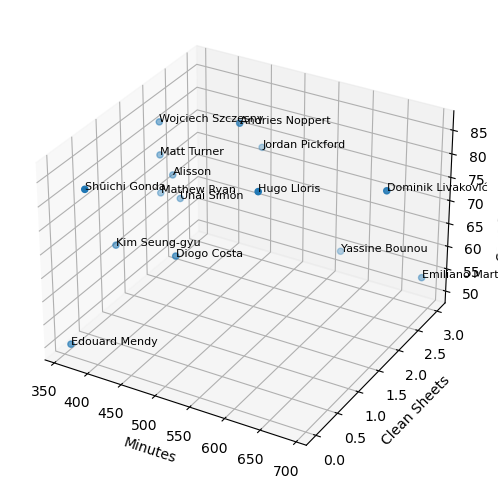

               player  gk_minutes  gk_save_pct  gk_clean_sheets
0             Alisson         379         71.4                2
1     Andries Noppert         480         86.4                2
2         Diogo Costa         450         64.7                1
3   Dominik Livaković         690         80.6                2
4       Edouard Mendy         360         50.0                0
5   Emiliano Martínez         690         53.8                3
6         Hugo Lloris         570         83.3                1
7     Jordan Pickford         450         72.7                3
8       Kim Seung-gyu         360         63.2                1
9         Mathew Ryan         360         66.7                2
10        Matt Turner         360         75.0                2
11      Shūichi Gonda         390         84.2                0
12         Unai Simón         390         66.7                2
13  Wojciech Szczęsny         360         82.1                2
14     Yassine Bounou         570       

In [8]:
player_keeper = pd.read_csv('player_keepers.csv')

#player_keeper.to_sql('Player_Keeper', conn)

keepers_data = pd.read_sql('SELECT player, gk_minutes, gk_save_pct, gk_clean_sheets FROM Player_Keeper WHERE gk_minutes > 270', conn)

keeper_x = keepers_data['gk_minutes']
keeper_y = keepers_data['gk_clean_sheets']
keeper_z = keepers_data['gk_save_pct']
keeper_names = keepers_data['player']

fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(keeper_x, keeper_y, keeper_z)

for i, txt in enumerate(keeper_names):
    ax.text(keeper_x.iloc[i], keeper_y.iloc[i], keeper_z.iloc[i], txt, fontsize=8)

ax.set_xlabel('Minutes')
ax.set_ylabel('Clean Sheets')
ax.set_zlabel('Save Percentage')

plt.savefig('keeper_graph.png')

plt.show()

print(keepers_data)
